In [1]:
import os
import pandas as pd
import tensorflow
import librosa
import glob
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from keras.utils import np_utils
import matplotlib.pyplot as plt
import librosa.display
from keras.models import load_model

Using TensorFlow backend.


In [2]:
model = load_model('test_with_new_data.model')

In [3]:
# import tensorflow as tf
# from tensorflow.keras.models import load_model

# model1 = load_model('test_with_new_data.model')

# converter = tf.lite.TFLiteConverter.from_keras_model(model1)
# tflite_model = converter.convert()
# open("litemodel_0_0.tflite", "wb").write(tflite_model)

In [8]:
def getSpeaker(filename):
    test_X, sample_rate = librosa.load(filename,res_type='kaiser_fast')
    print(test_X)
    print(type(test_X))
    print(test_X.shape)
    print(sample_rate)
    plt.figure(figsize=(12, 4))
    librosa.display.waveplot(test_X, sr=sample_rate)

    mfccs = np.mean(librosa.feature.mfcc(y=test_X, sr=sample_rate, n_mfcc=40).T,axis=0)
    test_X = np.array(mfccs)
    print(test_X)
    test_X=test_X.reshape((1, 40))
#     print(type(test_X))
#     print(test_X.shape)
#     print(test_X)
    predicted_label=model.predict(test_X)
#     print(predicted_label.argmax())
    labels = [' A. E. Maroney', ' Andrew NG', ' Anya', ' Arielle Lipshaw',
       ' Betty Chen', ' Bill Mosley', ' BookAngel7', ' Brendan Hodge',
       ' Brian von Dedenroth', ' Cata', ' Christie Nowak',
       ' David Mecionis', ' David Mix', ' Doug', ' E. Tavano', ' Hilara',
       ' Jean Bascom', ' Jeana Wei', ' Jennifer Wiginton',
       ' JenniferRutters', ' JenniferW', ' Jill Engle', ' John Rose',
       ' JudyGibson', ' Julie VW', ' JustinJYN', ' Kathy Caver',
       ' Lisa Meyers', ' M. Bertke', ' Malone', ' Mark Nelson',
       ' Mark Welch', ' Mary J', ' Michael Packard', ' Moromis',
       ' Nelly ()', ' Nicodemus', ' Peter Eastman', ' President Lethe',
       ' Ransom', ' Renata', ' Russ Clough', ' S R Colon',
       ' Scott Walter', ' Sharon Bautista', ' Simon Evers',
       ' Stephen Kinford', ' Steven Collins', ' Susan Hooks', ' Tonia',
       ' VOICEGUY', ' WangHaojie', ' Wayne Donovan', ' Wendy Belcher',
       ' Winston Tharp', ' aquielisunari', ' ashleyspence', ' badey',
       ' calystra', ' camelot2302', ' chocmuse', ' dexter', ' emmablob',
       ' fling93', ' iamartin', ' neelma', ' nprigoda', ' om123',
       ' ppezz', ' rohde', ' sid', ' spiritualbeing', ' thestorygirl',
       ' zinniz']
    sizes = predicted_label
#     print(sizes)
#     print(len(sizes))
#     print(type(sizes))
#     print(sizes[0])
#     print(len(sizes[0]))
#     print(type(sizes[0]))

#     print(sizes[0][0])
    k,=np.where(sizes[0]<= 0.005)
    print(k)
   
    sizes=np.delete(sizes[0],k)
    labels=np.delete(labels,k)  
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

.\dev-clean\3853\163249\3853-163249-0003.flac
[0.00540904 0.0075964  0.01268524 ... 0.00298679 0.00160354 0.        ]
<class 'numpy.ndarray'>
(151043,)
22050
[-2.4384924e+02  9.0558769e+01 -5.6603161e+01  7.7208420e+01
 -1.8054478e+01  1.5692620e+01 -6.6088052e+00 -1.6295033e+00
  8.7416725e+00  2.1792188e+00  4.8970246e+00 -3.1448907e-01
  7.5409126e+00 -5.2321620e+00  1.1506644e+01 -4.6343608e+00
  4.2906582e-02  5.5927453e+00 -3.5180380e+00  5.6432600e+00
  7.4233669e-01  3.3189375e+00  1.7611805e+00  5.2668972e+00
  3.6769936e+00  3.7645795e+00  3.8490489e+00  1.5322933e+00
  1.7953211e+00  3.9388683e-01  2.0850825e+00 -7.7344221e-01
  4.0286565e-01 -4.1807801e-01 -5.1869798e-01 -2.8815964e-01
  1.9445482e-01  1.6906111e+00  1.3293477e+00  1.9661003e+00]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73]


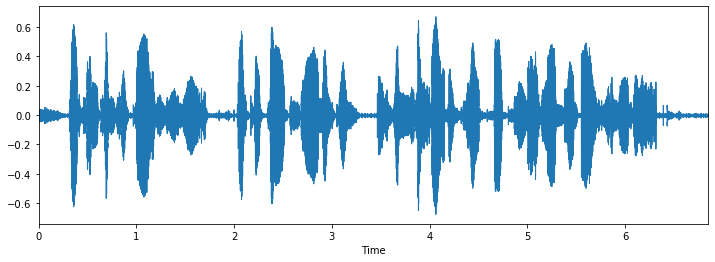

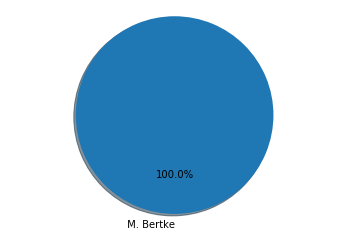

.\dev-clean\3853\163249\3853-163249-0002.flac
[-0.01642506 -0.02127305 -0.02019336 ...  0.01302421  0.00971885
  0.        ]
<class 'numpy.ndarray'>
(169014,)
22050
[-2.4734441e+02  8.9323418e+01 -5.7315643e+01  8.3291359e+01
 -3.5489376e+01  2.6341814e+01 -5.6285315e+00  1.6484490e-01
  1.1758935e+01  2.1674614e+00  9.5203733e+00 -2.0365167e+00
  1.1312016e+01 -1.9340028e+00  1.0140717e+01 -3.6613157e+00
  2.8838923e+00  3.6160996e+00 -5.0389910e+00  4.5647292e+00
 -1.7831616e+00  5.6925154e-01  2.9357310e-02  5.0719075e+00
  1.8225079e-02  2.5597765e+00  2.9242647e+00  9.9484688e-01
  5.4047704e+00  4.1882243e+00  4.7922845e+00  1.8569804e+00
  3.5635467e+00  1.6683009e+00  2.0897043e+00  2.1960239e+00
  1.5538442e+00  2.4012053e+00  1.0470083e+00  9.5848429e-01]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73]


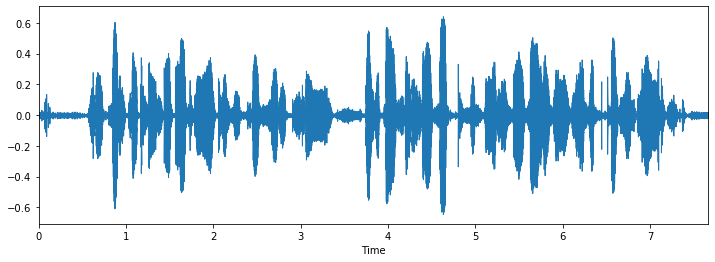

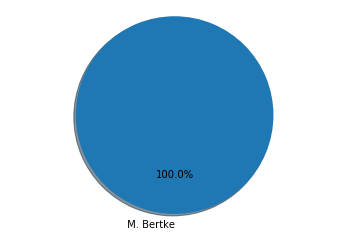

In [ ]:
while True:
    getSpeaker(input())

In [ ]:

# import os
# from pydub import AudioSegment
# from pydub.silence import split_on_silence
#
#
# # a function that splits the audio file into chunks
# # and applies speech recognition
# def silence_based_conversion(path="Surat (1).wav"):
#    # open the audio file stored in
#    # the local system as a wav file.
#    song = AudioSegment.from_wav(path)
#
#    # open a file where we will concatenate
#    # and store the recognized text
#    fh = open("recognized.txt", "w+")
#
#    # split track where silence is 0.5 seconds
#    # or more and get chunks
#    chunks = split_on_silence(song,
#                              # must be silent for at least 0.5 seconds
#                              # or 500 ms. adjust this value based on user
#                              # requirement. if the speaker stays silent for
#                              # longer, increase this value. else, decrease it.
#                              min_silence_len=500,
#
#                              # consider it silent if quieter than -16 dBFS
#                              # adjust this per requirement
#                              silence_thresh=-16
#                              )
#
#    # create a directory to store the audio chunks.
#    try:
#       os.mkdir('audio_chunks')
#    except(FileExistsError):
#       pass
#
#    # move into the directory to
#    # store the audio files.
#    os.chdir('audio_chunks')
#
#    i = 0
#    # process each chunk
#    for chunk in chunks:
#
#       # Create 0.5 seconds silence chunk
#       chunk_silent = AudioSegment.silent(duration=10)
#
#       # add 0.5 sec silence to beginning and
#       # end of audio chunk. This is done so that
#       # it doesn't seem abruptly sliced.
#       audio_chunk = chunk_silent + chunk + chunk_silent
#
#       # export audio chunk and save it in
#       # the current directory.
#       print("saving chunk{0}.wav".format(i))
#       # specify the bitrate to be 192 k
#       audio_chunk.export("./chunk{0}.wav".format(i), bitrate='192k', format="wav")
#
#       # the name of the newly created chunk
#       filename = 'chunk' + str(i) + '.wav'
#
#       print("Processing chunk " + str(i))
#
#       # get the name of the newly created chunk
#       # in the AUDIO_FILE variable for later use.
#       file = filename
#
#       # create a speech recognition object
#       r = sr.Recognizer()
#
#       # recognize the chunk
#       with sr.AudioFile(file) as source:
#          # remove this if it is not working
#          # correctly.
#          r.adjust_for_ambient_noise(source)
#          audio_listened = r.listen(source)
#
#       try:
#          # try converting it to text
#          rec = r.recognize_google(audio_listened)
#          # write the output to the file.
#          fh.write(rec + ". ")
#
#       # catch any errors.
#       except sr.UnknownValueError:
#          print("Could not understand audio")
#
#       except sr.RequestError as e:
#          print("Could not request results. check your internet connection")
#
#       i += 1
#
#    os.chdir('..')
#
#
# if __name__ == '__main__':
#
#    # print('Enter the audio file path')
#    # path = input()
#    path = "Surat (1).wav"
#
#    silence_based_conversion(path)
